In [1]:
# Импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# загрузка датасета
df = sns.load_dataset('penguins')

# увеличение максимальной ширины вывода для удобства
pd.set_option('display.width', 1000)
# выводим первые несколько строк датасета
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1  Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2  Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3  Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4  Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female


[2] Вывести в табличной форме статистику по датасету, включая
- Размерность всего датасета
- Количество признаков
- Количество целевых классов и объектов в каждом из классов
- Процент объектов с неопределенными признаками
- Иные ключевые характеристики датасета
Выбрать три класса и четыре количественных (недискретных) признака.
Сформировать на их основе «отфильтрованный» датасет для дальнейшего  анализа, удалив из датасета все объекты, для которых не определены значения хотя бы одного из выбранных четырех количественных признаков. 

In [3]:
# размерность датасета
print(f'Размерность датасета: {df.shape}')

# количество признаков
num_features = df.shape[1] - 1  # целевая переменная - species
print(f'Количество признаков: {num_features}')

# количество целевых классов и объектов в каждом из классов
target_counts = df['species'].value_counts()
print('Количество объектов в каждом классе:')
print(target_counts)

# процент объектов с неопределенными признаками
missing_percentage = df.isnull().mean() * 100
total_missing = missing_percentage.sum()
print(f'\nПроцент объектов с неопределенными признаками: {total_missing:.4f}%')

# иные характеристики
summary = df.describe()
print('Ключевые характеристики датасета:')
print(summary)

# выбираем три класса и четыре количественных признака
selected_classes = ['Adelie', 'Chinstrap', 'Gentoo']
selected_features = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']

# фильтрация данных
filtered_df = df[df['species'].isin(selected_classes)].dropna(subset=selected_features)

Размерность датасета: (344, 7)
Количество признаков: 6
Количество объектов в каждом классе:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Процент объектов с неопределенными признаками: 5.5233%
Ключевые характеристики датасета:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


[3] Выполнить визуализацию датасета по всем парам выбранных количественных  переменных, обозначая: 
- в графиках с разными парами переменных объекты из разных классов  различными по форме и цвету точками, 
- в графиках с одной и той же парой переменных – гистограммы с достаточным числом разбиений (обычно – не менее 20), либо плотности распределения переменной по оси признака.

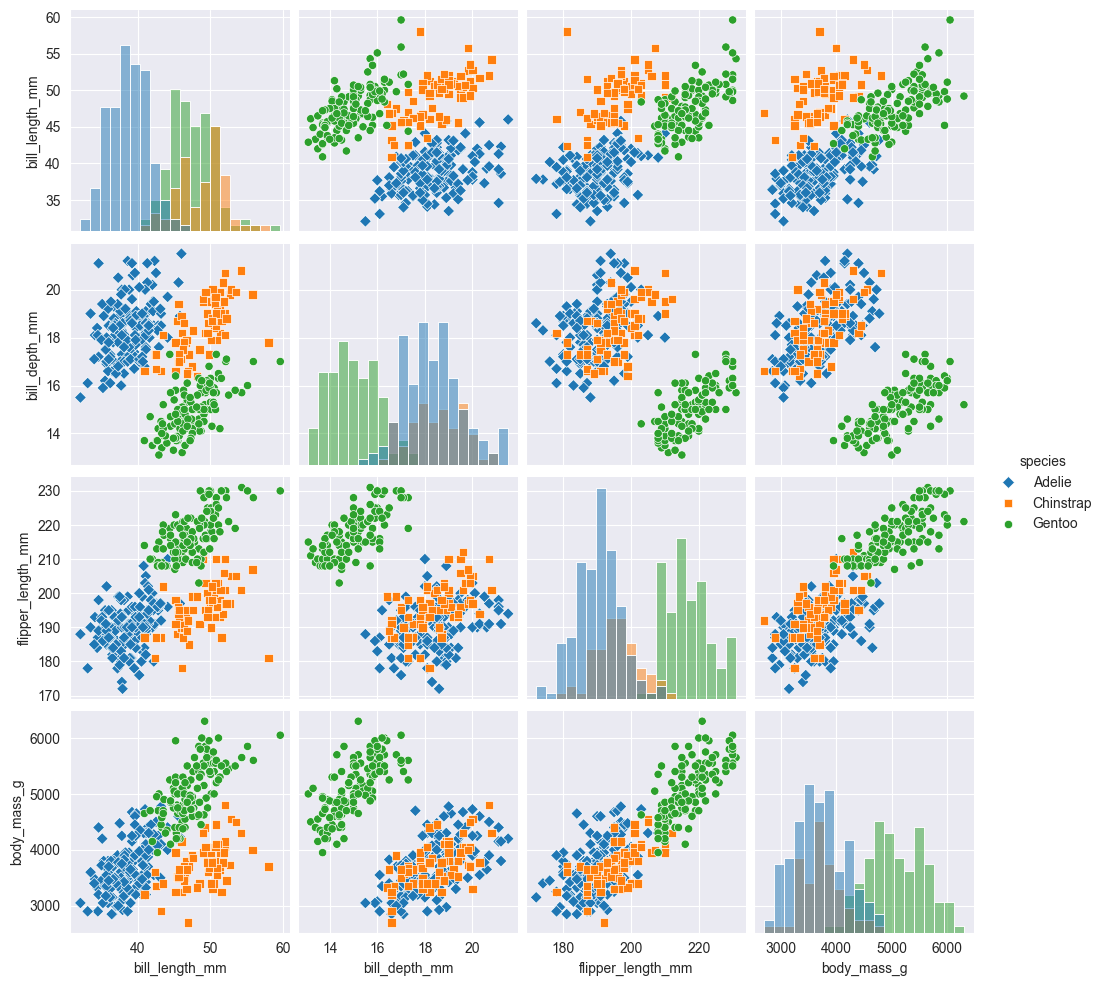

In [4]:
sns.pairplot(filtered_df, hue='species', markers=['D', 's', 'o'], diag_kind='hist', diag_kws={'bins': 20})
plt.show()

[4] В табличном варианте оценить степень сопряженности пар признаковпеременных на всем датасете, используя коэффициент корреляции Пирсона.
В табличном варианте оценить степень сопряженности пар признаков-переменных  в каждом классе датасета, используя коэффициент корреляции Пирсона. 

In [5]:
# увеличение максимальной ширины вывода для удобства
pd.set_option('display.width', 1000)

# Коэффициент корреляции Пирсона для всего датасета
correlation_matrix = filtered_df[selected_features].corr()
print('Коэффициент корреляции Пирсона для всех данных:')
print(correlation_matrix)

# Коэффициент корреляции для каждого класса
for species in selected_classes:
    species_data = filtered_df[filtered_df['species'] == species]
    corr_species = species_data[selected_features].corr()
    print(f'\nКоэффициент корреляции Пирсона для {species}:')
    print(corr_species)

Коэффициент корреляции Пирсона для всех данных:
                   flipper_length_mm  bill_length_mm  bill_depth_mm  body_mass_g
flipper_length_mm           1.000000        0.656181      -0.583851     0.871202
bill_length_mm              0.656181        1.000000      -0.235053     0.595110
bill_depth_mm              -0.583851       -0.235053       1.000000    -0.471916
body_mass_g                 0.871202        0.595110      -0.471916     1.000000

Коэффициент корреляции Пирсона для Adelie:
                   flipper_length_mm  bill_length_mm  bill_depth_mm  body_mass_g
flipper_length_mm           1.000000        0.325785       0.307620     0.468202
bill_length_mm              0.325785        1.000000       0.391492     0.548866
bill_depth_mm               0.307620        0.391492       1.000000     0.576138
body_mass_g                 0.468202        0.548866       0.576138     1.000000

Коэффициент корреляции Пирсона для Chinstrap:
                   flipper_length_mm  bill_length_m

[5] Выбрать пару целевых классов и все количественные признаки.
Используя метод LDA (линейный дискриминантный анализ), построить решающую
функцию алгоритма, разграниченные решающей функцией зоны и отдельные  объекты классов на всех парах количественных признаков. 

In [6]:
# генерация сетки для визуализации
def cells(X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    return xx, yy


def plot_lda_decision_boundary(lda, X, y, ax):
    # Применяем LDA к двум признакам
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')

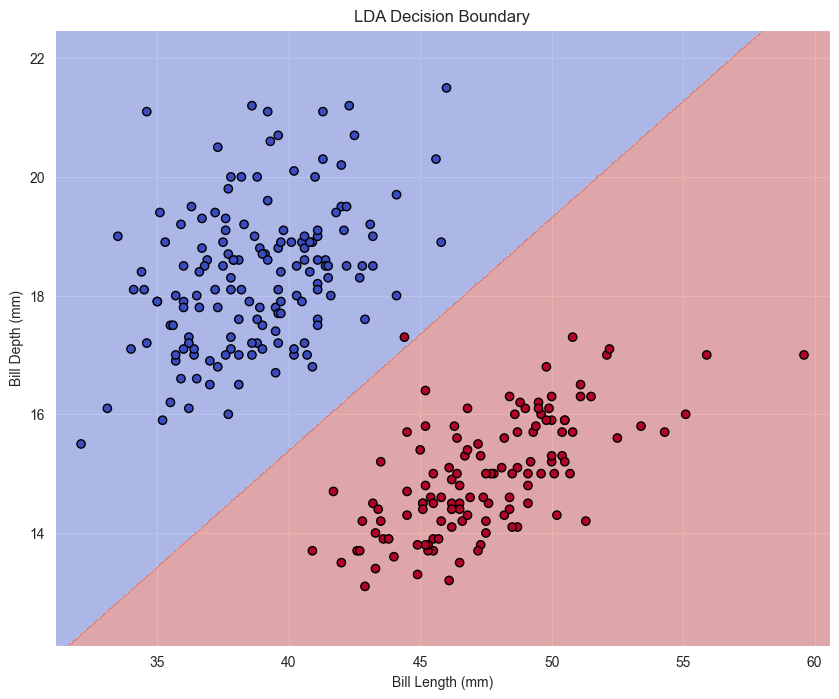

In [7]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

# выбор двух классов и всех количественных признаков
selected_classes = ['Adelie', 'Gentoo']
selected_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# фильтрация данных
filtered_df = df[df['species'].isin(selected_classes)].dropna(subset=selected_features)

# кодирование целевой переменной
le = LabelEncoder()
filtered_df['species_encoded'] = le.fit_transform(filtered_df['species'])

# разделение на признаки и целевую переменную
X = filtered_df[selected_features].values
y = filtered_df['species_encoded'].values

# применение LDA
lda = LDA()
lda.fit(X, y)

# генерация сетки для визуализации
xx, yy = cells(X)

# визуализация
fig, ax = plt.subplots(figsize=(10, 8))

# используем только первые два признака для LDA и визуализации
X_lda = filtered_df[['bill_length_mm', 'bill_depth_mm']].values
lda.fit(X_lda, y)
plot_lda_decision_boundary(lda, X_lda, y, ax)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('LDA Decision Boundary')
plt.show()

[6] Для одной из пар количественных признаков из пункта [5] на одном рисунке
одновременно построить (а) решающую функцию LDA и (б) линейную регрессию  одного количественного признака от другого. 

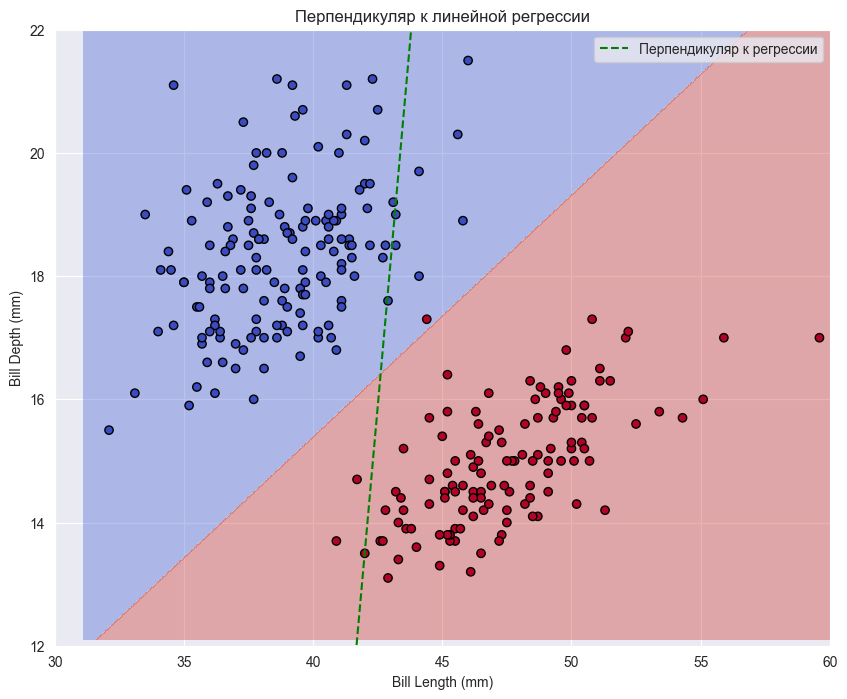

In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Выбор двух классов
selected_classes = ['Adelie', 'Gentoo']
filtered_df = df[df['species'].isin(selected_classes)].dropna(subset=['bill_length_mm', 'bill_depth_mm'])

# Кодирование целевой переменной
le = LabelEncoder()
filtered_df['species_encoded'] = le.fit_transform(filtered_df['species'])

# Применение LDA
X_lda = filtered_df[['bill_length_mm', 'bill_depth_mm']].values
y = filtered_df['species_encoded'].values

lda = LDA()
lda.fit(X_lda, y)

xx, yy = cells(X_lda)

# Визуализация LDA
fig, ax = plt.subplots(figsize=(10, 8))
plot_lda_decision_boundary(lda, X_lda, y, ax)

# Линейная регрессия
X_reg = filtered_df[['bill_length_mm']].values
y_reg = filtered_df['bill_depth_mm'].values

# Обучение модели линейной регрессии
linear_regressor = LinearRegression()
linear_regressor.fit(X_reg, y_reg)

# Вычисление углового коэффициента и перехвата (y = mx + b)
slope = linear_regressor.coef_[0]  # Угловой коэффициент (наклон)
intercept = linear_regressor.intercept_  # Перехват

# Вычисление перпендикулярного наклона: обратный и с противоположным знаком
perpendicular_slope = -1 / slope

# Построение перпендикулярной линии через среднюю точку
x_mean = np.mean(filtered_df['bill_length_mm'])
y_mean = np.mean(filtered_df['bill_depth_mm'])

# Генерация точек для перпендикулярной линии
x_vals = np.linspace(30, 60, 100)  # Диапазон x в пределах от 30 до 60 мм
y_vals_perp = perpendicular_slope * (x_vals - x_mean) + y_mean

# Добавление перпендикуляра на график
# ax.plot(filtered_df['bill_length_mm'], y_pred, color='red', label='Линейная регрессия')
ax.plot(x_vals, y_vals_perp, color='green', label='Перпендикуляр к регрессии', linestyle='--')

# Настройка пределов осей
ax.set_xlim([30, 60])
ax.set_ylim([12, 22])

# Настройка графика
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Перпендикуляр к линейной регрессии')
plt.legend()
plt.show()


[7] Выбрать два количественных признака и пару целевых классов
На отдельных рисунках с осями количественных признаков построить решающие
функции, разграниченные решающей функцией зоны и отдельные объекты классов для методов (а) LDA, (б) SVM, (в) логистическая регрессия, (г) наивный  байесовский классификатор

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [10]:
selected_classes = ['Adelie', 'Gentoo']
selected_features = ['bill_length_mm', 'bill_depth_mm']

filtered_df = df[df['species'].isin(selected_classes)].dropna(subset=selected_features)

le = LabelEncoder()
filtered_df['species_encoded'] = le.fit_transform(filtered_df['species'])

# разделение на обучающую и тестовую выборки
X = filtered_df[selected_features].values
y = filtered_df['species_encoded'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
models = {
    'LDA': LDA(),
    'Logistic Regression': LogisticRegression(),
    'SVM (Linear)': SVC(kernel='linear', probability=True),
    'Naive Bayes': GaussianNB()
}

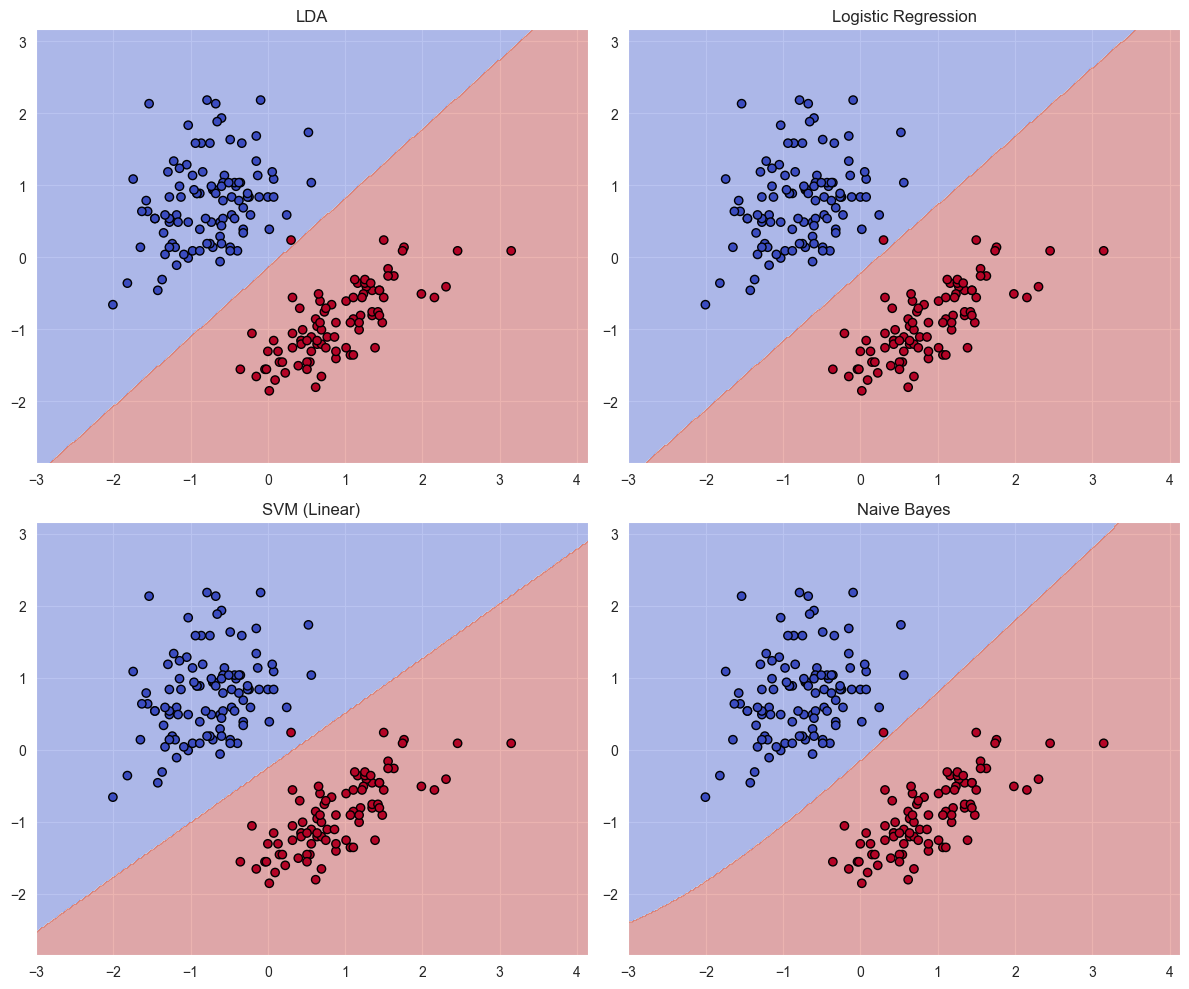

In [12]:
xx, yy = cells(X_train)


def plot_decision_boundary(model, ax, title):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
    ax.set_title(title)


# графики
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
for ax, (name, model) in zip(axs.ravel(), models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, ax, name)

plt.tight_layout()
plt.show()

[8] Выбрать целевой класс и для каждого метода из пункта [7]:
- Вывести матрицу ошибок.
- Вывести значения sensitivity, specificity, precision, recall.
- Построить ROC кривую и рассчитать метрику AUC.

Матрица ошибок для LinearDiscriminantAnalysis:
[[48  0]
 [ 0 35]]
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, Specificity: 1.00


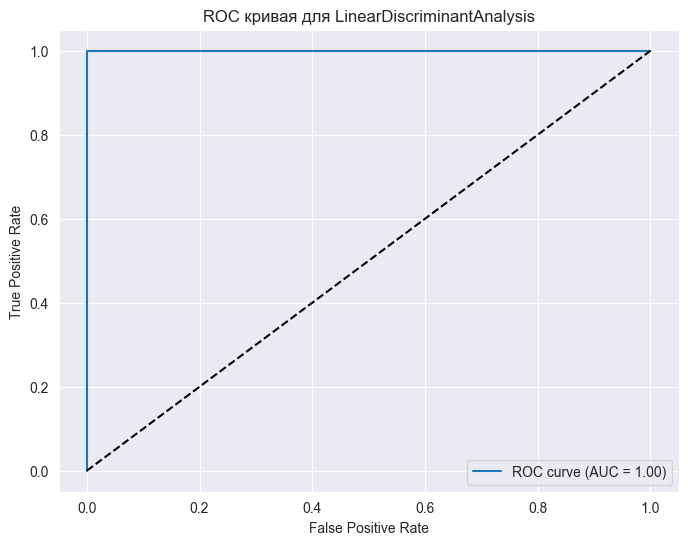

AUC: 1.00
Матрица ошибок для LogisticRegression:
[[48  0]
 [ 0 35]]
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, Specificity: 1.00


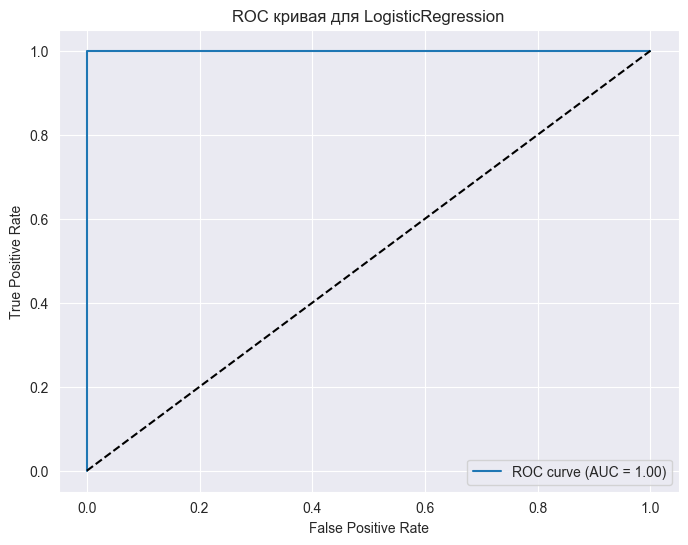

AUC: 1.00
Матрица ошибок для SVC:
[[48  0]
 [ 0 35]]
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, Specificity: 1.00


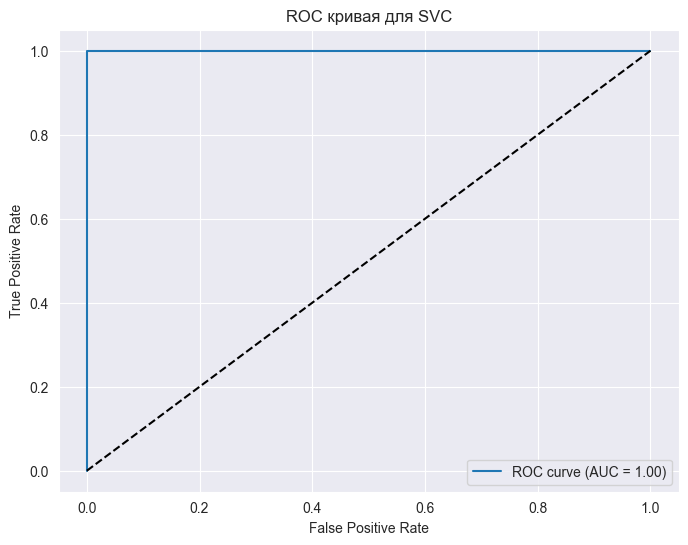

AUC: 1.00
Матрица ошибок для GaussianNB:
[[48  0]
 [ 0 35]]
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, Specificity: 1.00


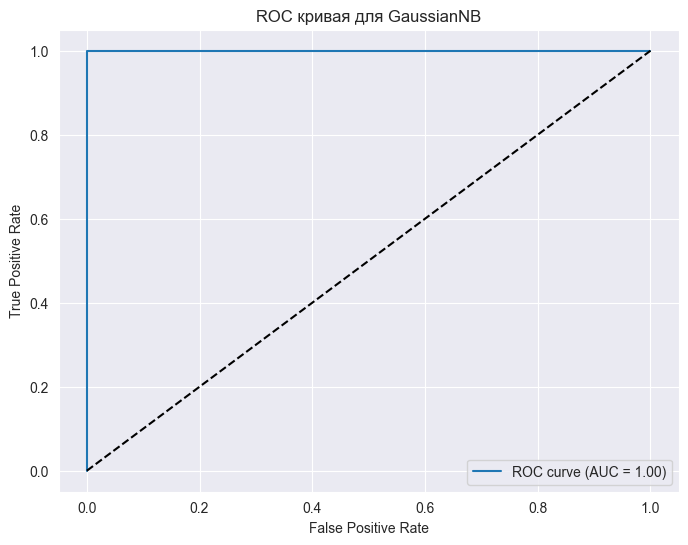

AUC: 1.00


In [13]:
# функция для оценки модели
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)

    # вывод матрицы ошибок
    cm = confusion_matrix(y_test, y_pred)
    print(f'Матрица ошибок для {model.__class__.__name__}:')
    print(cm)

    # вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, Specificity: {specificity:.2f}')

    # ROC и AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC кривая для {model.__class__.__name__}')
    plt.legend()
    plt.show()

    print(f'AUC: {auc:.2f}')


# оценка каждой модели
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)